# GRIP-The Sparks Foundation

Data Science and Business Analyts Internship

Task-4  EDA-Terrorism

Author:- Prit Rameshbhai Sheta

Dataset = Terrorism

# Import liraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px

import folium
from folium.plugins import MarkerCluster


import warnings
warnings.filterwarnings("ignore")

# Load a Data set

In [2]:
globalterrorism = pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1') #loading dataset

globalterrorism.head() #print first 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
globalterrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
globalterrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
globalterrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Countries','provstate':'state','region_txt':'Region',
                               'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                               'gname':'Group','targtype1_txt':'Targettype','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)

We will use only data which is helpful for processing from the whole dataset

In [6]:
globalterrorism = globalterrorism[['Year','Month','Day','Countries','state','Region','city','success','latitude','longitude','AttackType','Killed',
                            'Wounded','Target','Summary','Group','Targettype','Weapon_Type','Motive']]

In [7]:
globalterrorism.head()

,Year,Month,Day,Countries,state,Region,city,success,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Targettype,Weapon_Type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,1,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,1,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,1,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,1,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,1,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
globalterrorism.shape

(181691, 19)

In [9]:
#check the null values in dataset
globalterrorism.isnull().sum()

Year                0
Month               0
Day                 0
Countries           0
state             421
Region              0
city              434
success             0
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Targettype          0
Weapon_Type         0
Motive         131130
dtype: int64

In [10]:
globalterrorism.info()           #information about  dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Countries    181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   success      181691 non-null  int64  
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Targettype   181691 non-null  object 
 17  Weapon_Type  181691 non-null  object 
 18  Motive       50561 non-n

In [11]:
globalterrorism.duplicated().sum()     #checking the duplicate values

9459

In [12]:
globalterrorism.nunique()   #check the unique values in dataset

Year               47
Month              13
Day                32
Countries         205
state            2855
Region             12
city            36674
success             2
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Targettype         22
Weapon_Type        12
Motive          14490
dtype: int64

In [13]:
globalterrorism.describe()

,Year,Month,Day,success,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.889598,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.313391,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# Destructive Feature of Data

In [14]:
print("Country with the most attacks:",globalterrorism['Countries'].value_counts().idxmax())
print("City with the most attacks:",globalterrorism['city'].value_counts().index[1])
print("Region with the most attacks:",globalterrorism['Region'].value_counts().idxmax())
print("Year with the most attacks:",globalterrorism['Year'].value_counts().idxmax())
print("Month with the most attacks:",globalterrorism['Month'].value_counts().idxmax())
print("Group with the most attacks:",globalterrorism['Group'].value_counts().index[1])
print("Most Attack Type:",globalterrorism['AttackType'].value_counts().idxmax())


Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Type: Bombing/Explosion


In [15]:
globalterrorism['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visulization

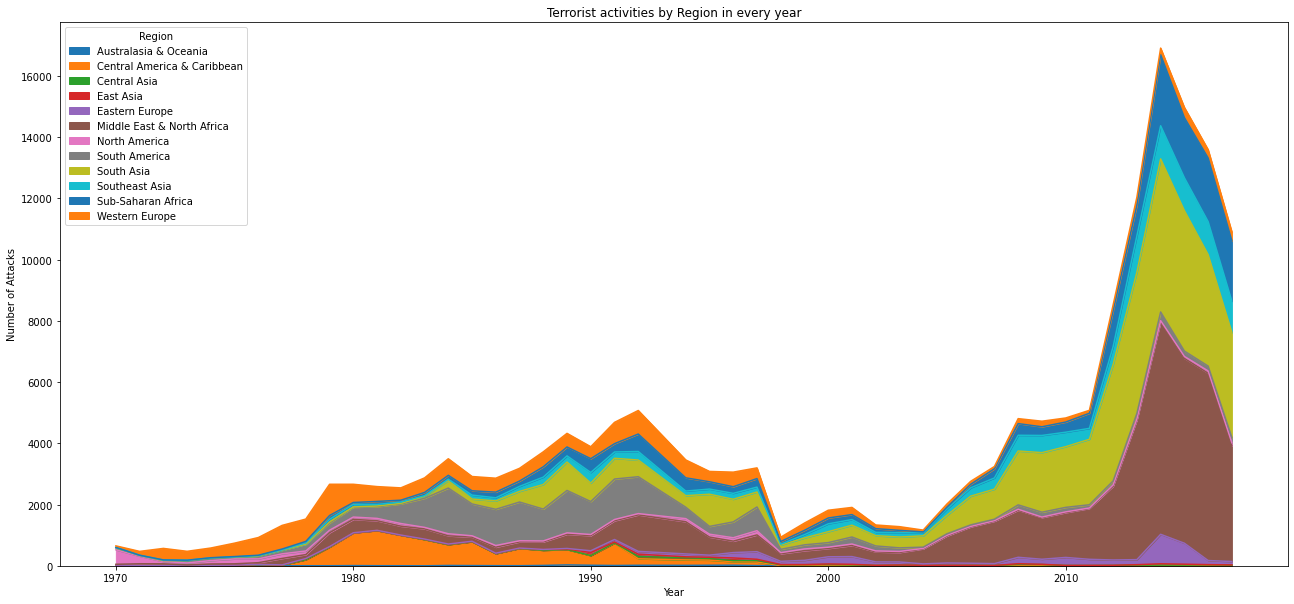

In [16]:
#globalterrorism activities by Region in every year

pd.crosstab(globalterrorism.Year,globalterrorism.Region).plot(kind = 'area', figsize=(22,10))
plt.title("Terrorist activities by Region in every year")
plt.ylabel('Number of Attacks')
plt.show()


There has been a huge spike since 2000 specially in Middle East & North Africa and South Asia.

In [17]:
globalterrorism['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

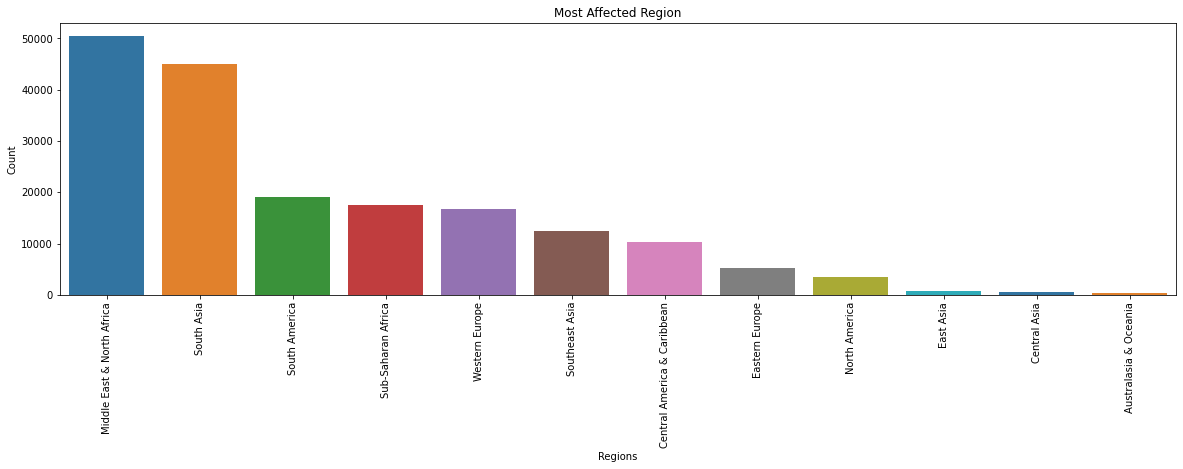

In [18]:
#plotting the bar plot
plt.figure(figsize = (20,5))
sns.barplot(globalterrorism['Region'].value_counts()[:15].index, globalterrorism['Region'].value_counts()[:15].values,palette='tab10')
plt.title('Most Affected Region')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)

Most Affected Region = Middle East & North Africa
Least Affected Region =  Australasia & Oceania   

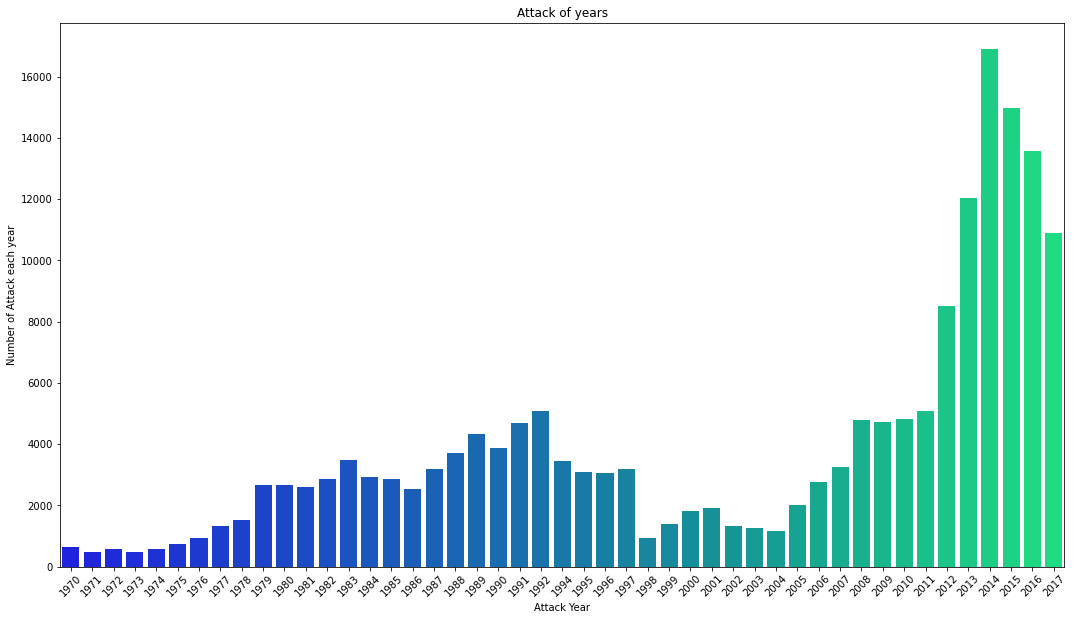

In [19]:
x_year = globalterrorism['Year'].unique()
y_count_years = globalterrorism['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'winter')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attack each year')
plt.title('Attack of years')
plt.show()

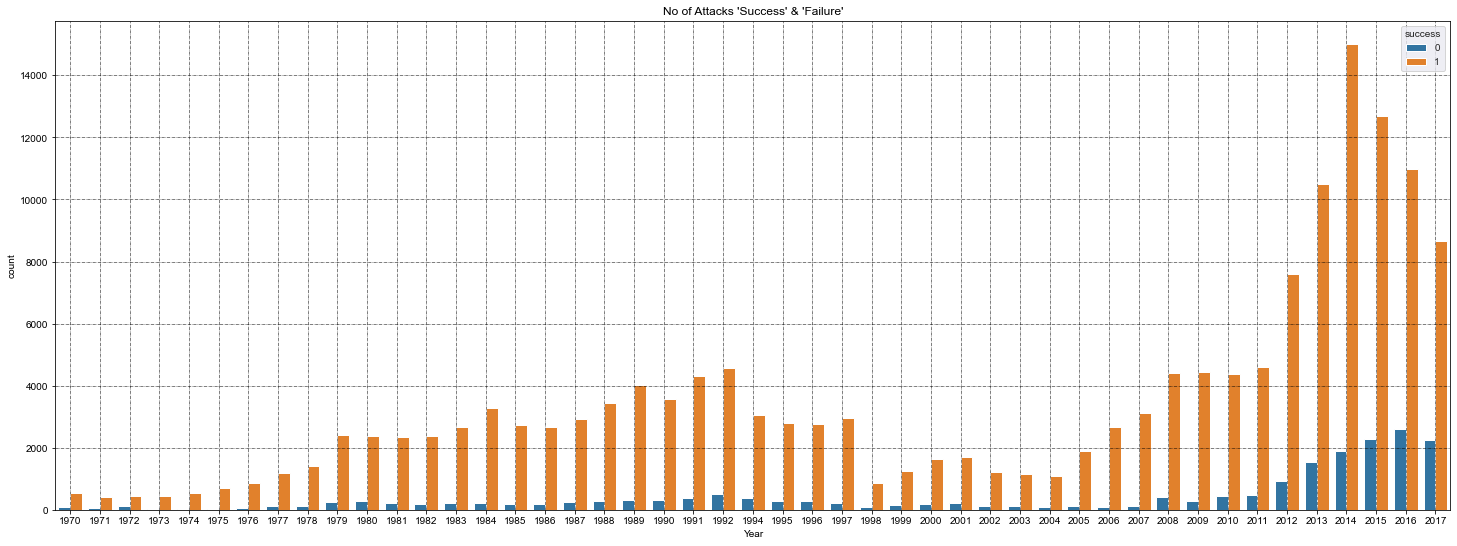

In [20]:
plt.figure(figsize=(25,9))   
plt.title("No of Attacks 'Success' & 'Failure'")
sns.set_style('darkgrid') 
sns.countplot(x ='Year', hue = "success", data = globalterrorism)
plt.grid(color = 'black',linestyle = '-.',linewidth = 0.5)
plt.show()

In [21]:
#Top  Affectec Countries

globalterrorism['Countries'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Countries, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

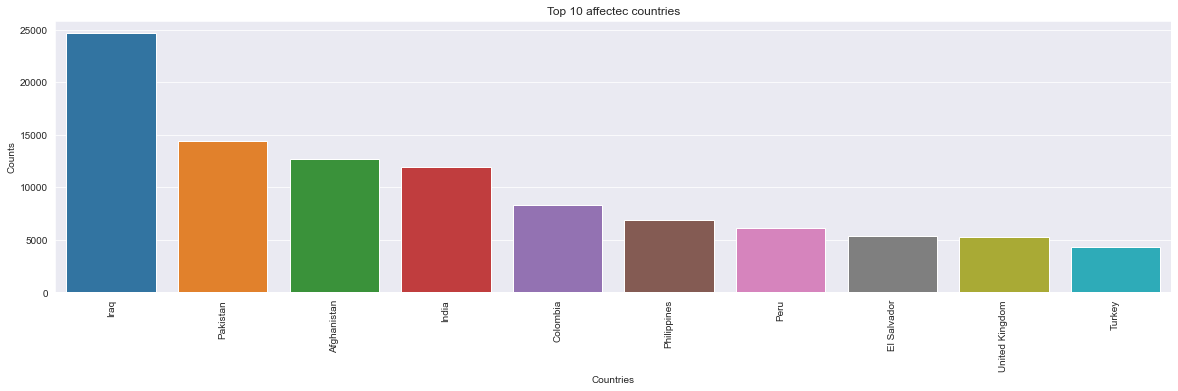

In [22]:
#plot Top 10 affectec countries

plt.figure(figsize = (20,5))
sns.barplot(globalterrorism['Countries'].value_counts()[:10].index, globalterrorism['Countries'].value_counts()[:10].values)
plt.title('Top 10 affectec countries')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

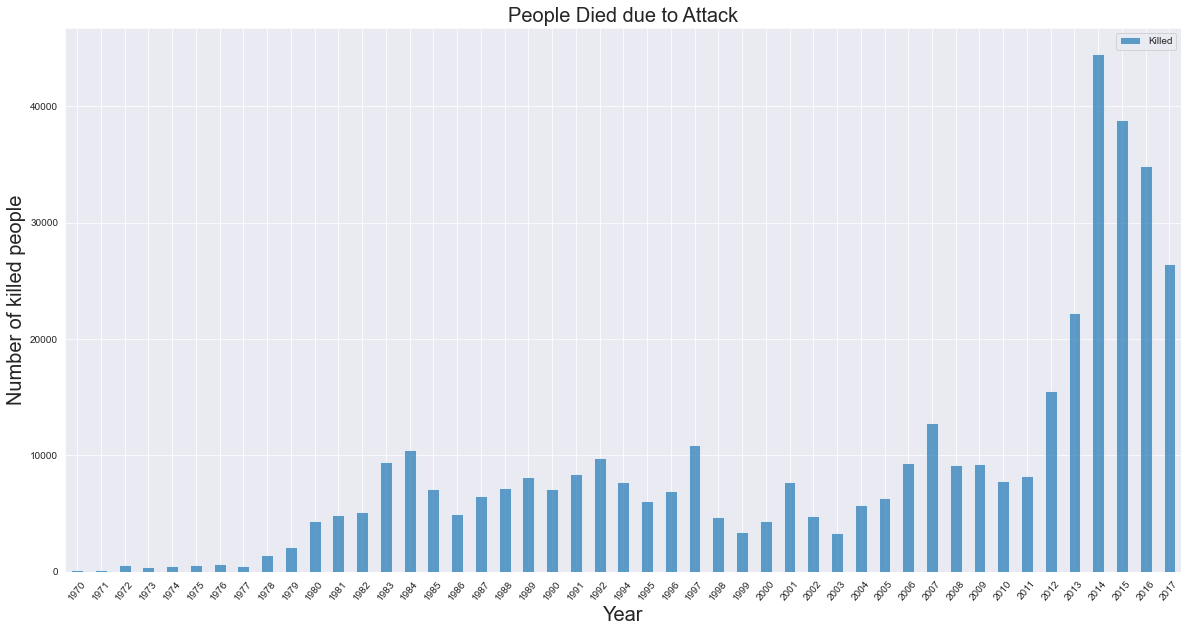

In [23]:
globalterrorism = globalterrorism[['Year','Killed']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
globalterrorism.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('People Died due to Attack',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of killed people',fontsize=20)
plt.show()